# 1. Text Preprocessing
Text data must be cleaned and processed before feeding it into a machine learning or deep learning model because raw text is noisy and unstructured.

a. Tokenization
Tokenization involves splitting the text into smaller components, usually words. Each word is treated as an individual unit (called a "token"). For example, the sentence "This movie is great!" will be split into individual tokens: ["This", "movie", "is", "great"]. This step converts the text into a format that the model can work with more easily.

b. Stopword Removal
Stopwords are common words like "is", "the", "and", which do not carry much meaning in terms of sentiment analysis. Removing them helps simplify the text and reduces the amount of noise that the model has to deal with. Since these words are ubiquitous in all types of sentences, their presence doesn't help the model differentiate between positive and negative sentiment.

c. Lemmatization
Lemmatization is a process that reduces words to their base or root form. For instance, the words "running", "ran", and "runs" would all be reduced to "run". This step helps in reducing the number of unique words in the text, which simplifies the problem for the model. It also ensures that different forms of the same word are treated as the same feature in the model.

2. Data Preparation
Once the text is cleaned, it must be converted into a format that a neural network can process. Deep learning models can’t handle raw text directly; they work with numbers. This is where text tokenization and padding come into play.

a. Tokenization and Sequence Conversion
We convert the words in the text into integers, with each unique word represented by a unique number. For instance, in the dataset, words like "movie" might be represented by the number 3, "great" by 5, and so on. The entire text data is transformed into sequences of integers that correspond to the words in each review.

For example, the sentence "The movie is great" could be represented as [1, 5, 2, 7] where each number corresponds to a word based on the vocabulary built from the dataset.

b. Padding
Since different sentences or reviews have different lengths, we need to make them uniform for processing in a neural network. Padding is used to ensure that every sentence has the same length by adding extra "dummy" values (usually zeros) to the end of shorter sentences. For example, if the maximum sentence length is set to 100, a review that is 80 words long would be padded with 20 zeros.

c. Label Encoding
The sentiment labels (positive or negative) need to be converted into numeric values. Since this is a binary classification problem, we use 1 to represent a "positive" sentiment and 0 for "negative." This makes it easier for the model to perform classification.

3. Train-Test Split
Once the data is prepared, we split it into two parts:

Training Set: This is the portion of the data that the model will learn from. The model identifies patterns between the input data (text reviews) and the corresponding labels (positive or negative).
Test Set: This is the portion of the data that the model has not seen before. After training, we use the test set to evaluate the model’s performance. The split is usually around 80% for training and 20% for testing.
4. Building an RNN (LSTM) Model
For this task, we use an LSTM (Long Short-Term Memory) model, which is a type of Recurrent Neural Network (RNN). RNNs are designed to handle sequential data, like text, where the order of words matters. LSTM is particularly good at learning dependencies over longer sequences because it can "remember" important information from earlier in the sequence for later use.

a. Embedding Layer
The first layer of the model is an embedding layer, which converts the integer sequences (representing words) into dense vectors of fixed size. These vectors represent the "meaning" of the words in a continuous vector space. Each word is mapped to a high-dimensional space where semantically similar words are placed closer together. This helps the model understand the context of words in the sentence.

b. LSTM Layer
The LSTM layer is the core of the model. LSTM is particularly well-suited for handling text data because it can capture long-term dependencies in sequences of words. It remembers important pieces of information over long distances and helps the model focus on the context of the sentence, not just individual words.

c. Dropout Layer
Dropout is a regularization technique used to prevent overfitting. It works by randomly "dropping out" (ignoring) some of the neurons in the network during training. This forces the network to learn more robust patterns in the data, making it less reliant on any one feature.

d. Dense Output Layer
The final layer is a dense (fully connected) layer with a sigmoid activation function, which outputs a single value between 0 and 1. This value represents the probability of the input text being positive or negative. If the output is closer to 1, the text is classified as positive; if it’s closer to 0, it’s classified as negative.

5. Training the Model
We train the model using the training data. The goal of training is to adjust the weights of the network so that it learns to predict the correct sentiment for each review. The loss function used is binary cross-entropy, which is suitable for binary classification tasks. The optimizer used is Adam, which is a popular algorithm that adjusts the learning rate dynamically to improve convergence.

6. Evaluating Model Performance
After training, the model’s performance is evaluated using the test data. Metrics like accuracy are calculated to see how well the model is performing. Additionally, a confusion matrix is used to assess the number of correct and incorrect predictions. A classification report provides more detailed metrics such as precision, recall, and F1-score.

Accuracy: The percentage of correct predictions.
Precision: How many of the positive predictions were actually positive.
Recall: How many actual positives were correctly identified by the model.
F1-score: The harmonic mean of precision and recall, providing a single measure of the model's accuracy.
7. Visualizing Training History
To understand how well the model trained, we plot the accuracy and loss over time (for each epoch) for both the training and validation sets. This helps identify if the model is overfitting (where it performs well on training data but poorly on unseen data) or underfitting (where it doesn’t learn the patterns in the training data well enough).

8. Using Pre-trained Word Embeddings (Optional)
An improvement to the model can be made by using pre-trained word embeddings like GloVe or Word2Vec. These embeddings are trained on massive amounts of text data and provide a better understanding of word meanings. Instead of randomly initializing the embedding layer, we can load pre-trained vectors that already capture word similarities, which can improve model performance significantly.

For example, the word "good" and "great" would be placed closer together in the vector space using pre-trained embeddings, which helps the model understand that they both indicate positive sentiment.



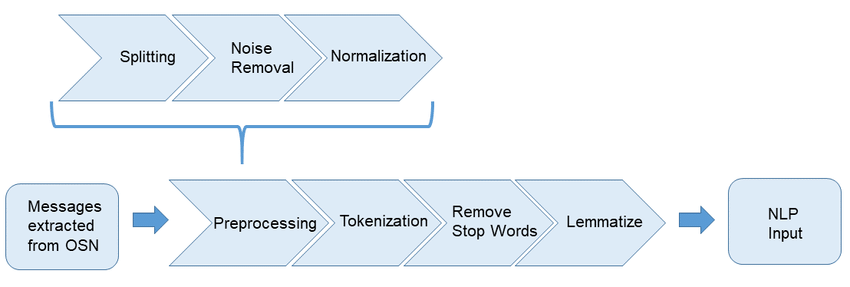

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the labeled dataset (Movie Reviews - Replace with your dataset if needed)
# Using Kaggle dataset 'IMDB Movie Reviews' here for illustration purposes
url = "https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv"
df = pd.read_csv(url)
df.head()

# Step 1: Text Preprocessing (Tokenization, stopword removal, and Lemmatization)

# Instantiate Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and lemmatize each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    
    return ' '.join(tokens)

# Apply the preprocessing to the dataset
df['processed_review'] = df['review'].apply(preprocess_text)

# Step 2: Preparing Data for Model (Tokenization and Padding)
# Tokenize and convert to sequences
tokenizer = Tokenizer(num_words=10000)  # Limiting to top 10,000 words
tokenizer.fit_on_texts(df['processed_review'])
sequences = tokenizer.texts_to_sequences(df['processed_review'])

# Padding the sequences to ensure uniform length
maxlen = 100  # Define max length for padding
X = pad_sequences(sequences, maxlen=maxlen)

# Convert sentiment labels (positive/negative) to binary
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
y = df['sentiment'].values

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the RNN (LSTM) Model for Sentiment Analysis

# Define the model architecture
model = Sequential()

# Embedding Layer (Using GloVe embeddings if needed, otherwise random initialization)
embedding_dim = 100
model.add(Embedding(input_dim=10000, output_dim=embedding_dim, input_length=maxlen))

# LSTM Layer
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))  # Regularization to avoid overfitting

# Dense Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model's Performance

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Test Accuracy:", test_acc)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 7: Visualize Training History
# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 8: Explore Improvements with Pre-trained Embeddings (Optional)

# If using pre-trained GloVe embeddings (e.g., GloVe.6B.100d.txt), you can load them here
# Download GloVe embeddings from: https://nlp.stanford.edu/projects/glove/

def load_glove_embeddings(filepath, embedding_dim=100):
    embeddings_index = {}
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Create an embedding matrix that matches the tokenizer's word index
def create_embedding_matrix(word_index, embeddings_index, embedding_dim=100):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Load GloVe and create the embedding matrix
# glove_embeddings = load_glove_embeddings('path/to/glove.6B.100d.txt')
# embedding_matrix = create_embedding_matrix(tokenizer.word_index, glove_embeddings)

# Replace the Embedding layer's weights with the pre-trained embeddings:
# model.layers[0].set_weights([embedding_matrix])
# model.layers[0].trainable = False  # Freeze the embeddings layer for efficient training

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iShop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iShop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iShop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
F:\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 131s 192ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 213ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 245ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 157ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 141ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.0000e+00 - loss: nan
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step


F:\anaconda\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.